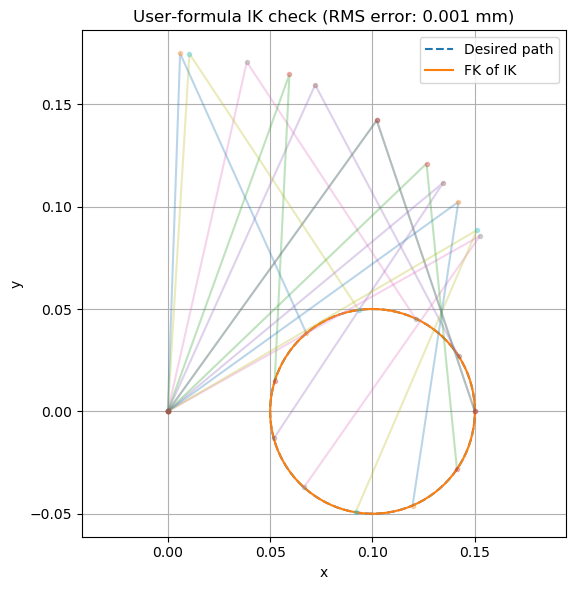

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Link parameters (same units for everything) ---
L1 = 0.175   # hip-to-knee link length
L2 = 0.15  # knee-to-toe link length

# --- Desired task-space trajectory: a circle ---
R_desired = 0.05                # circle radius
xc, yc     = 0.10, 0.00         # circle centre

t = np.linspace(0, 2*np.pi, 200)
x_d = xc + R_desired * np.cos(t)
y_d = yc + R_desired * np.sin(t)

# --- IK using the user's formula -------------------------------------------
def ik(x, y, L1=L1, L2=L2):
    """
    Inverse kinematics based on the formula provided by the user.
    Returns joint angles (theta1, theta2) in radians.
    """
    R = np.hypot(x, y)                                  # distance to foot
    # prevent domain errors
    R = np.clip(R, 1e-9, L1 + L2 - 1e-9)
    
    r  = np.arccos((L1*L1 + L2*L2 - R*R) / (2 * L1 * L2))
    l1 = np.arccos((L2*L2 + R*R - L1*L1) / (2 * L2 * R))
    l2 = np.arccos((L1*L1 + R*R - L2*L2) / (2 * L1 * R))
    
    theta1_deg = (l2 + np.arcsin(y / R))
    theta2_deg = (180/np.pi) * ((-(-1.5708 + l1 + np.arccos(y / R)))-theta1_deg)
    theta1_deg = (180/np.pi) * theta1_deg

    
    return np.deg2rad(theta1_deg), np.deg2rad(theta2_deg)

theta1, theta2 = ik(x_d, y_d)

# --- Forward kinematics to verify ------------------------------------------
x_fk = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
y_fk = L1*np.sin(theta1) + L2*np.sin(theta1+theta2)

# --- Compute RMS error in task space ---------------------------------------
rms_err = np.sqrt(np.mean((x_fk - x_d)**2 + (y_fk - y_d)**2))

# --- Plot desired vs achieved ----------------------------------------------
plt.figure(figsize=(6, 6))
plt.plot(x_d, y_d, linestyle='--', label='Desired path')
plt.plot(x_fk, y_fk, label='FK of IK')

# show leg pose every ~30°
for idx in np.linspace(0, len(t)-1, 12, dtype=int):
    x0, y0 = 0.0, 0.0
    x1, y1 = L1*np.cos(theta1[idx]), L1*np.sin(theta1[idx])
    x2, y2 = x_fk[idx], y_fk[idx]
    plt.plot([x0, x1, x2], [y0, y1, y2], alpha=0.3)
    plt.plot([x0, x1, x2], [y0, y1, y2], linestyle='', marker='o', markersize=3, alpha=0.3)

plt.axis('equal')
plt.title(f'User-formula IK check (RMS error: {rms_err*1000:.3f} mm)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()

